***Rede Neural Convolucional básica***

In [1115]:
import tensorflow as tf
import keras as k
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

In [1116]:
print(tf.__version__)
print(k.__version__)

2.12.0-rc0
2.12.0


In [1117]:
from keras.preprocessing.image import ImageDataGenerator

**Configurações da imagem**

In [1118]:
width = 160
height = 160

In [1119]:
dataPath = 'dataset_personagens/dataset_personagens/'

In [1120]:
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    height_shift_range=0.05,
    rotation_range=7
    )

validation_datagen = ImageDataGenerator(rescale=1./255)

In [1121]:
training_set = train_datagen.flow_from_directory(dataPath + 'training_set', shuffle=True ,target_size=(width, height), batch_size=BATCH_SIZE, class_mode='binary')
validation_set = validation_datagen.flow_from_directory(dataPath + 'test_set', shuffle=True ,target_size=(width, height), batch_size=BATCH_SIZE, class_mode='binary')

Found 196 images belonging to 2 classes.
Found 73 images belonging to 2 classes.


**Criação da rede**

In [1122]:
classifier = Sequential()
classifier.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(160, 160 ,3)))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(32, 3, padding='same', activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(64, 3, padding='same', activation='relu'))
classifier.add(MaxPooling2D())
classifier.add(Flatten())
classifier.add(Dense(128, activation='relu'))
classifier.add(Dense(128, activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))


In [1123]:
classifier.compile(optimizer=k.optimizers.Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy'])

***Agora deve ser feito o treinamento da IA***

In [1124]:
steps_per_epoch = 6 # train_datagen.samples // train_data_gen.batch_size
validation_steps = 2# validation_datagen.samples // validation_datagen.batch_size
epochs=100

classifier.fit_generator(training_set, steps_per_epoch=steps_per_epoch, epochs=epochs,validation_data=validation_set, validation_steps=validation_steps, verbose=0)

C:\Users\pedro\AppData\Local\Temp\ipykernel_12656\312658599.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set, steps_per_epoch=steps_per_epoch, epochs=100,validation_data=validation_set, validation_steps=validation_steps, verbose=0)


***Fazendo previsões com o modelo***

In [1125]:
import numpy as np
import tensorflow.keras.utils as image
import os

In [1134]:
path = dataPath + 'test_set/'
homerPath = 'homer'
bartPath = 'bart'
homerCounter = 0
bartCounter = 0

results_prediction = [[0,0],
           [0,0]]

index = 0
maxQtd = len(os.listdir(path + '/homer')) + len(os.listdir(path + '/bart'))

pathHomer = path + 'homer'
for fileName in os.listdir(pathHomer):
    caminho = os.path.join(pathHomer, fileName)
    test_image = image.load_img(caminho, target_size=(width, height))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    
    result = classifier.predict(test_image, verbose=0)
    training_set.class_indices
    if(result[0][0] == 1):
        results_prediction[0][0] += 1
        prediction = 'Homer'
        homerCounter += 1
    else:
        results_prediction[0][1] += 1
        prediction = 'Bart'
        bartCounter += 1
    index += 1
    print(f'{(index/maxQtd)*100}% - {result[0]}')
    
pathBart = path + 'bart'    
for fileName in os.listdir(pathBart):
    caminho = os.path.join(pathBart, fileName)
    test_image = image.load_img(caminho, target_size=(width, height))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    
    result = classifier.predict(test_image, verbose=0)
    training_set.class_indices
    if(result[0][0] == 1):
        results_prediction[1][0] += 1
        prediction = 'Homer'
        homerCounter += 1
    else:
        results_prediction[1][1] += 1
        prediction = 'Bart'
        bartCounter += 1
    index += 1
    print(f'{(index/maxQtd)*100}% - {result[0]}')
    
        

1.36986301369863% - [1.]
2.73972602739726% - [1.]
4.10958904109589% - [1.]
5.47945205479452% - [1.]
6.8493150684931505% - [0.]
8.21917808219178% - [1.]
9.58904109589041% - [1.]
10.95890410958904% - [1.]
12.32876712328767% - [1.]
13.698630136986301% - [1.]
15.068493150684931% - [1.]
16.43835616438356% - [1.]
17.80821917808219% - [1.]
19.17808219178082% - [1.]
20.54794520547945% - [0.]
21.91780821917808% - [1.]
23.28767123287671% - [0.]
24.65753424657534% - [0.]
26.027397260273972% - [0.]
27.397260273972602% - [1.]
28.767123287671232% - [0.]
30.136986301369863% - [1.]
31.506849315068493% - [1.]
32.87671232876712% - [1.]
34.24657534246575% - [1.]
35.61643835616438% - [1.]
36.986301369863014% - [0.]
38.35616438356164% - [1.]
39.726027397260275% - [1.]
41.0958904109589% - [0.]
42.465753424657535% - [1.]
43.83561643835616% - [0.]
45.20547945205479% - [0.]
46.57534246575342% - [0.]
47.94520547945205% - [0.]
49.31506849315068% - [0.]
50.68493150684932% - [0.]
52.054794520547944% - [0.]
53.4246

In [1135]:
results_prediction

[[23, 8], [3, 39]]

In [1136]:
print(f'Homer: {homerCounter} - Bart: {bartCounter}')

Homer: 26 - Bart: 47


***Imprime a matriz de confusão***

In [1137]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

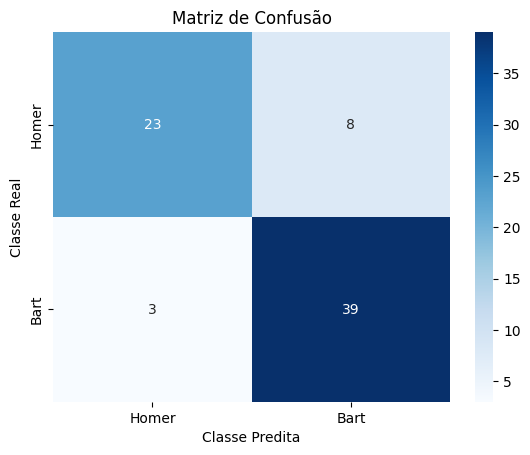

In [1138]:
classes = ['Homer', 'Bart']
sns.heatmap(results_prediction, annot=True, xticklabels=classes, yticklabels=classes, fmt='d', cmap='Blues')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

In [1139]:
def calcular_metricas(matriz, classes = None):
    if classes is None:
        classes = np.arange(matriz.shape[0])
    TP = np.diag(matriz)  # True Positives
    FP = np.sum(matriz, axis=0) - TP  # False Positives
    FN = np.sum(matriz, axis=1) - TP  # False Negatives
    TN = np.sum(matriz) - (TP + FP + FN)  # True Negatives

    # Precisão (Precision)
    precisao = TP / (TP + FP)

    # Sensibilidade (Recall) ou Taxa de Verdadeiros Positivos (TPR)
    sensibilidade = TP / (TP + FN)

    # F1
    f1 = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)

    # Acurácia (Accuracy)
    acuracia = (TP + TN) / (TP + TN + FP + FN)

    metricas = {
        'precisao': {x: y for x, y in zip(classes, precisao)},
        'sensibilidade': {x: y for x, y in zip(classes, sensibilidade)},
        'f1': {x: y for x, y in zip(classes, f1)},
        'acuracia': acuracia,
    }
    
    return metricas

In [1140]:
def imprimir_metricas(metricas):
    print('classe\tPrecisão\tRecall\t\tF1')
    for classe in metricas['precisao']:
        print(f'{classe}\t{metricas["precisao"][classe]:.4f}\t\t{metricas["sensibilidade"][classe]:.4f}\t\t{metricas["f1"][classe]:.4f}')
    print(f'\nAcurácia: {metricas["acuracia"][0]:.4f}')
    

In [1141]:
metricas = calcular_metricas(results_prediction, classes=classes)
imprimir_metricas(metricas)

classe	Precisão	Recall		F1
Homer	0.8846		0.7419		0.8070
Bart	0.8298		0.9286		0.8764

Acurácia: 0.8493
